In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [142]:
df=pd.read_csv(r"customer_churn_dataset-training-master.csv")

In [143]:
df.sample(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
240337,246909.0,20.0,Male,37.0,12.0,0.0,26.0,Basic,Monthly,816.05,1.0,1.0
361945,369060.0,32.0,Male,54.0,29.0,3.0,14.0,Standard,Quarterly,537.70,13.0,0.0
337663,344778.0,26.0,Female,2.0,7.0,0.0,1.0,Standard,Annual,504.17,11.0,0.0
97613,100486.0,52.0,Female,5.0,10.0,6.0,8.0,Basic,Quarterly,239.00,30.0,1.0
38445,38745.0,33.0,Male,21.0,15.0,10.0,11.0,Basic,Quarterly,626.00,16.0,1.0
159825,164636.0,22.0,Male,49.0,7.0,4.0,29.0,Basic,Annual,781.00,13.0,1.0
283558,290672.0,33.0,Male,17.0,14.0,0.0,14.0,Standard,Annual,639.89,16.0,0.0
257110,264224.0,38.0,Male,50.0,22.0,3.0,12.0,Premium,Annual,619.59,17.0,0.0
369634,376749.0,27.0,Female,15.0,18.0,1.0,18.0,Basic,Quarterly,950.31,5.0,0.0
10548,10557.0,29.0,Female,34.0,30.0,4.0,4.0,Premium,Monthly,698.00,5.0,1.0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [145]:
data=df.drop("CustomerID",axis=1)

In [146]:
data.dropna(inplace=True)

In [147]:
data.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [148]:
data.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [149]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder

In [150]:
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


C:\Users\HP\AppData\Local\Temp\ipykernel_24936\1779254536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


<Axes: xlabel='Age', ylabel='Density'>

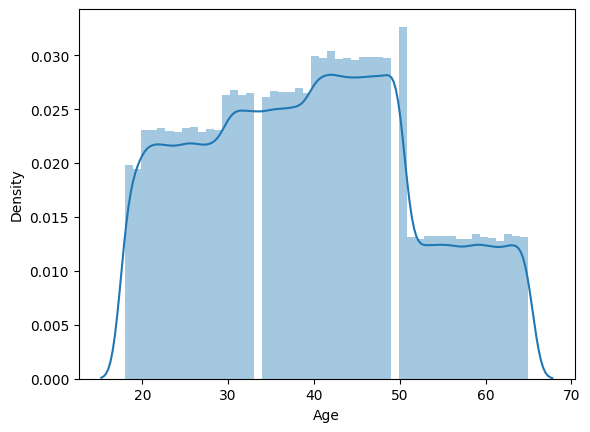

In [151]:
sns.distplot(data["Age"])

C:\Users\HP\AppData\Local\Temp\ipykernel_24936\2695343029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data["Gender"],order=data["Gender"].value_counts().index,palette="viridis")


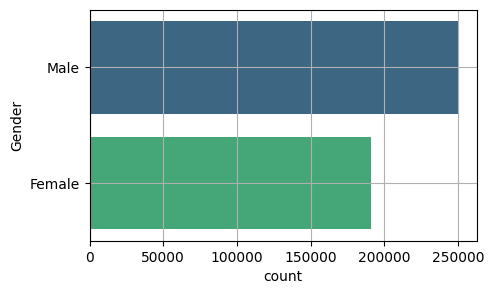

In [152]:
plt.figure(figsize=(5,3))
sns.countplot(data["Gender"],order=data["Gender"].value_counts().index,palette="viridis")
plt.grid()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20ae2376980>,
 'caps': [<matplotlib.lines.Line2D at 0x20ae2376ec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ae23766e0>],
 'medians': [<matplotlib.lines.Line2D at 0x20ae2377400>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ae23776a0>],
 'means': []}

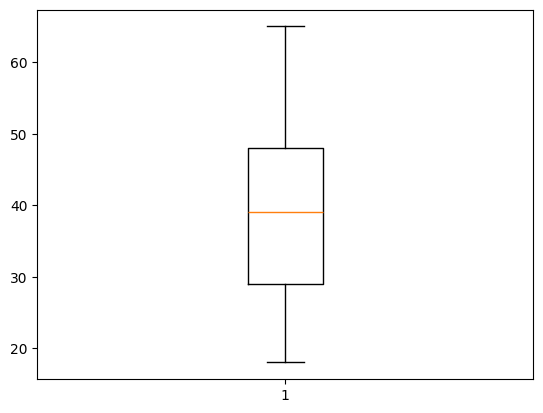

In [153]:
plt.boxplot(data["Age"])

In [154]:
data["Churn"].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_24936\3609411752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Tenure"])


<Axes: xlabel='Tenure', ylabel='Density'>

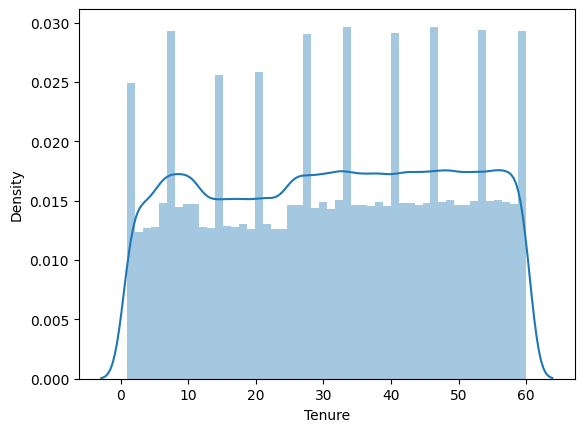

In [155]:
sns.distplot(data["Tenure"])

C:\Users\HP\AppData\Local\Temp\ipykernel_24936\2090464195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Total Spend"])


<Axes: xlabel='Total Spend', ylabel='Density'>

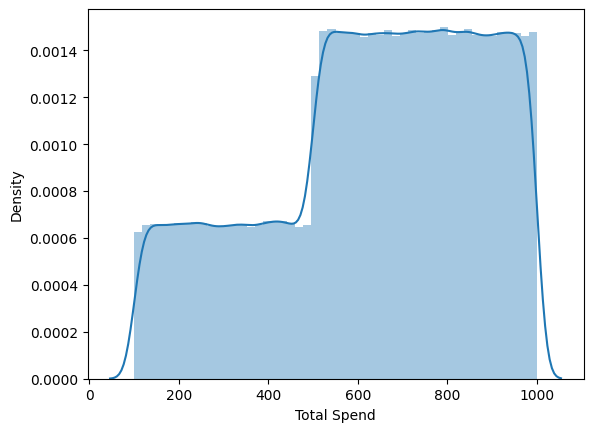

In [156]:
sns.distplot(data["Total Spend"])

In [157]:
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [158]:
data["Age"].corr(data["Churn"])

0.2183939185771007

In [159]:
correlation=data.drop(["Gender","Subscription Type","Contract Length"],axis=1)

In [160]:
correlation.corr()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
Age,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Tenure,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903,-0.051919
Usage Frequency,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077684,0.574267
Payment Delay,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429355
Last Interaction,0.028980,-0.006903,-0.004662,0.077684,0.042708,-0.056890,1.000000,0.149616
Churn,0.218394,-0.051919,-0.046101,0.574267,0.312129,-0.429355,0.149616,1.000000


In [161]:
# from above Tenure,support Calls ,have less than 5 % correlation with tenure so we can remove them

<Axes: xlabel='Payment Delay', ylabel='Density'>

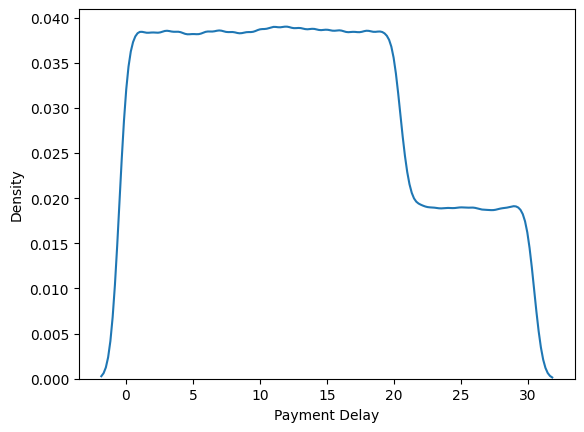

In [162]:
sns.kdeplot(data["Payment Delay"])

In [163]:
data.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [164]:
data["Subscription Type"].unique()

array(['Standard', 'Basic', 'Premium'], dtype=object)

In [165]:
data["Contract Length"].unique()

array(['Annual', 'Monthly', 'Quarterly'], dtype=object)

In [166]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [167]:
object_col=[i for i in data.columns if data[i].dtype==object]

In [168]:
object_col

['Gender', 'Subscription Type', 'Contract Length']

In [169]:
numerical=[i for i in data.columns if data[i].dtype!=object]
numerical

['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction',
 'Churn']

<Axes: xlabel='count', ylabel='Subscription Type'>

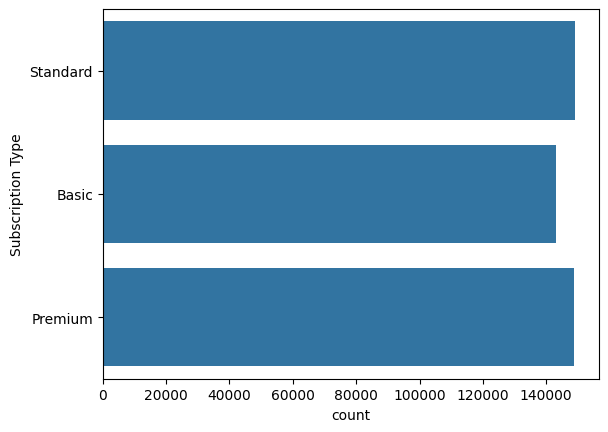

In [170]:
sns.countplot(data["Subscription Type"])

<Axes: xlabel='count', ylabel='Contract Length'>

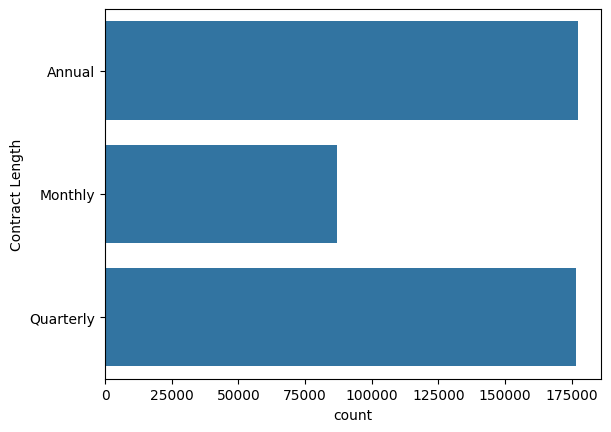

In [171]:
sns.countplot(data["Contract Length"])

In [172]:
# Gender', 'Subscription Type', 'Contract Length'
ohe=OneHotEncoder()
encoded=ohe.fit_transform(data[["Gender","Subscription Type","Contract Length"]])

In [173]:
encoded_array=encoded.toarray()
encoded_df=pd.DataFrame(encoded_array,columns=ohe.get_feature_names_out(["Gender","Subscription Type","Contract Length"]))

In [174]:
encoded_df

,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
440827,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
440828,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
440829,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
440830,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [175]:
new_df=pd.concat([data,encoded_df],axis=1)

In [176]:
new_df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
440832,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
new_df.drop(["Gender","Subscription Type","Contract Length"],axis=1,inplace=True)

In [178]:
new_df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [179]:
new_df.dropna(inplace=True)

In [180]:
y=new_df["Churn"]

In [181]:
new_df.corr()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
Age,1.000000,-0.011629,-0.007189,0.158450,0.061738,-0.084685,0.028981,0.218393,0.032156,-0.032156,0.005191,-0.004417,-0.000723,-0.036763,0.088842,-0.035410
Tenure,-0.011629,1.000000,-0.026801,-0.027639,-0.016588,0.019006,-0.006905,-0.051917,-0.008021,0.008021,-0.002613,0.000880,0.001707,0.008418,-0.021126,0.008744
Usage Frequency,-0.007189,-0.026801,1.000000,-0.022012,-0.014470,0.018631,-0.004663,-0.046100,-0.006356,0.006356,0.000027,0.000306,-0.000332,0.007697,-0.019601,0.008227
Support Calls,0.158450,-0.027639,-0.022012,1.000000,0.162889,-0.221594,0.077686,0.574266,0.092198,-0.092198,0.011575,-0.006902,-0.004557,-0.092848,0.229053,-0.093229
Payment Delay,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312130,0.051540,-0.051540,0.003995,-0.002576,-0.001379,-0.049910,0.127788,-0.053903
Total Spend,-0.084685,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056889,-0.429356,-0.067766,0.067766,-0.008749,0.003699,0.004961,0.069938,-0.172036,0.069820
Last Interaction,0.028981,-0.006905,-0.004663,0.077686,0.042708,-0.056889,1.000000,0.149618,0.028751,-0.028751,0.002397,-0.003476,0.001102,-0.022961,0.060606,-0.026275
Churn,0.218393,-0.051917,-0.046100,0.574266,0.312130,-0.429356,0.149618,1.000000,0.175315,-0.175315,0.020481,-0.011035,-0.009239,-0.175837,0.433308,-0.176172
Gender_Female,0.032156,-0.008021,-0.006356,0.092198,0.051540,-0.067766,0.028751,0.175315,1.000000,-1.000000,0.000722,-0.003188,0.002471,-0.029389,0.067606,-0.025531
Gender_Male,-0.032156,0.008021,0.006356,-0.092198,-0.051540,0.067766,-0.028751,-0.175315,-1.000000,1.000000,-0.000722,0.003188,-0.002471,0.029389,-0.067606,0.025531


In [182]:
# saving the ohe encoder as pkl file

import pickle

In [183]:
with open("encoder.pkl","wb") as file:
    pickle.dump(ohe,file)

In [184]:
new_df

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440827,45.0,6.0,25.0,2.0,15.0,837.00,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
440828,42.0,54.0,15.0,1.0,3.0,716.38,8.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
440829,25.0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
440830,26.0,35.0,27.0,1.0,5.0,977.31,9.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [185]:
x=new_df.drop(["Churn"],axis=1)

In [186]:
x.shape,y.shape

((440831, 15), (440831,))

In [187]:
# saving this data for further training

In [188]:
model_data=pd.concat([x,y],axis=1)

In [189]:
model_data

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,Churn
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440827,45.0,6.0,25.0,2.0,15.0,837.00,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
440828,42.0,54.0,15.0,1.0,3.0,716.38,8.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
440829,25.0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
440830,26.0,35.0,27.0,1.0,5.0,977.31,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [190]:
model_data.to_csv("preprocessed_data.csv",index=False)